In [5]:
# ===============================
# ADVERTISING DATASET - CLASSIFICATION
# ===============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from scipy import stats

In [6]:
df = pd.read_csv("/content/advertising  (2).csv")

print(df.head())
print("Shape:", df.shape)
print("Columns:", df.columns)
print(df.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Sh

In [7]:
print(df.isnull().sum())

# Mean imputation
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)

df.dropna(inplace=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


/tmp/ipython-input-3631163349.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [8]:
# Assume last column is target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [9]:
# Label Encoding example
le = LabelEncoder()
y = le.fit_transform(y)

# One Hot Encoding if categorical features exist
df = pd.get_dummies(df, drop_first=True)

In [10]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

In [11]:
mms = MinMaxScaler()
X_train_mms = mms.fit_transform(X_train)
X_test_mms = mms.transform(X_test)

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

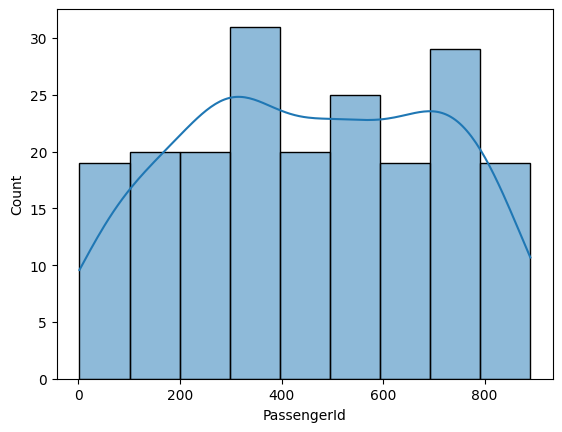

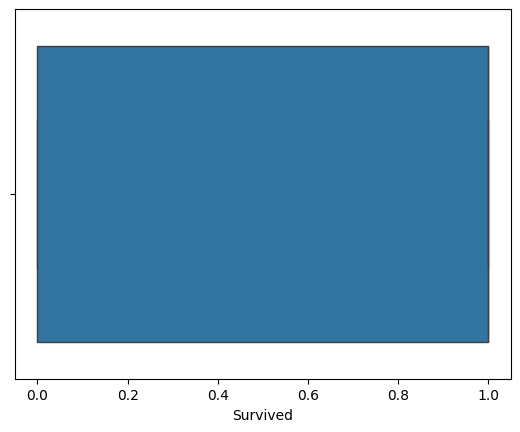

Skewness: -0.6965957136211035


In [12]:
sns.histplot(df.iloc[:,0], kde=True)
plt.show()

sns.boxplot(x=df.iloc[:,1])
plt.show()

print("Skewness:", df.iloc[:,1].skew())

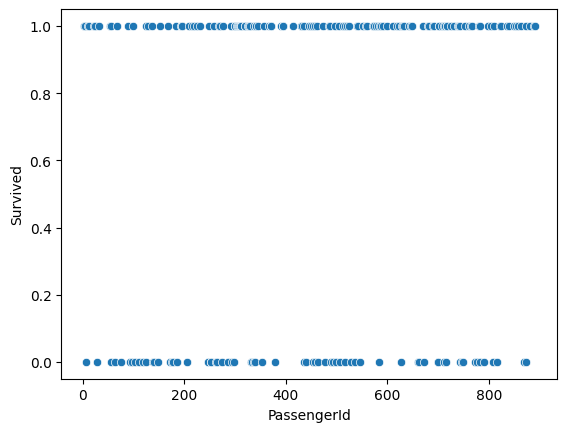

Correlation: 0.11198533868386248


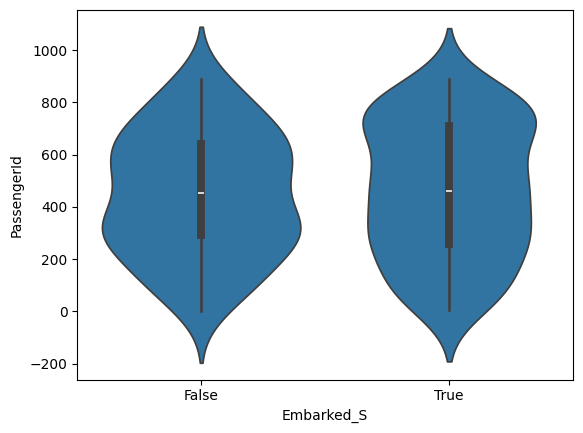

In [13]:
sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1])
plt.show()

print("Correlation:", df.iloc[:,0].corr(df.iloc[:,1]))

sns.violinplot(x=df.iloc[:,-1], y=df.iloc[:,0])
plt.show()

In [ ]:
sns.pairplot(df)
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

Z-Score Outlier Indexes:
(array([  3,   7,  14,  15,  24,  39,  47,  79,  89,  91,  95, 141, 150,
       155, 162, 167, 173, 178, 189]), array([2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 5, 3, 6, 2, 2, 6, 2, 2, 2]))
Isolation Forest Outliers:
(array([  3,   7,  15,  24,  34,  39,  47,  79,  89,  95, 137]),)
LOF Outliers:
(array([  7,  15,  21,  67,  79,  95, 119, 150, 152, 156, 163, 166, 167,
       170, 179]),)


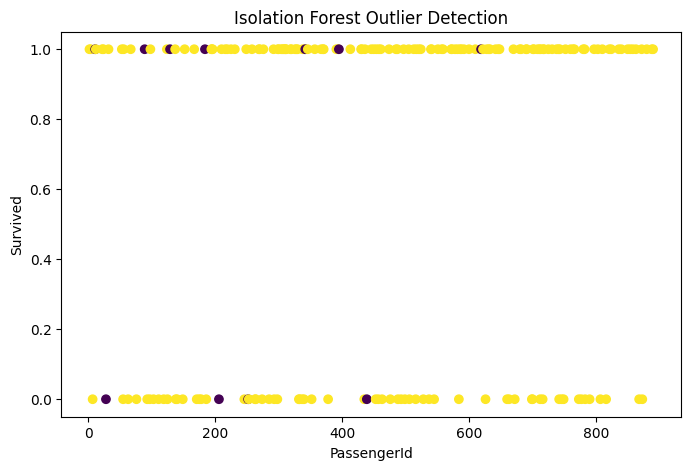

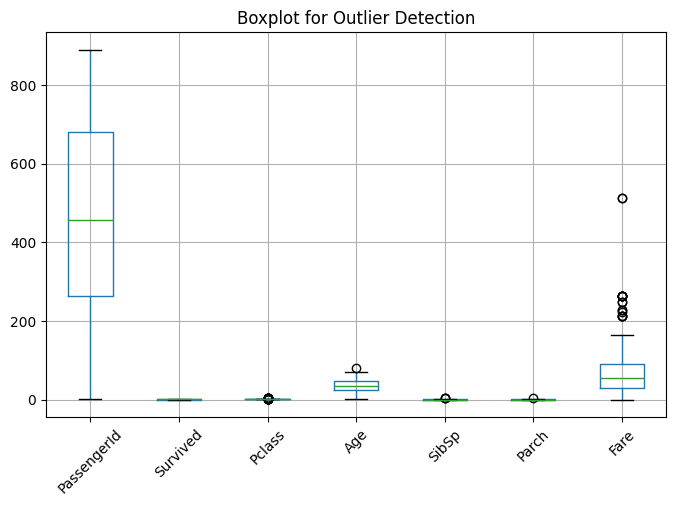

In [10]:
# ==============================
# OUTLIER DETECTION - ADVERTISING DATASET
# ==============================

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# Load dataset
df = pd.read_csv("/content/advertising  (2).csv")

# Clean column names (VERY IMPORTANT)
df.columns = df.columns.str.strip()

# Handle missing values properly (no warnings)
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

df.dropna(inplace=True)

# Select numeric data
numeric_df = df.select_dtypes(include=np.number)

# ==============================
# 1️⃣ Z-SCORE METHOD
# ==============================

z = np.abs(stats.zscore(numeric_df))
z_outliers = (z > 3)

print("Z-Score Outlier Indexes:")
print(np.where(z_outliers))

# ==============================
# 2️⃣ ISOLATION FOREST
# ==============================

iso = IsolationForest(contamination=0.05, random_state=0)
iso_pred = iso.fit_predict(numeric_df)

print("Isolation Forest Outliers:")
print(np.where(iso_pred == -1))

# ==============================
# 3️⃣ LOCAL OUTLIER FACTOR (LOF)
# ==============================

lof = LocalOutlierFactor()
lof_pred = lof.fit_predict(numeric_df)

print("LOF Outliers:")
print(np.where(lof_pred == -1))

# ==============================
# VISUALIZATION
# ==============================

# Automatically pick first two numeric columns for plotting
col1 = numeric_df.columns[0]
col2 = numeric_df.columns[1]

plt.figure(figsize=(8,5))
plt.scatter(numeric_df[col1], numeric_df[col2], c=iso_pred)
plt.xlabel(col1)
plt.ylabel(col2)
plt.title("Isolation Forest Outlier Detection")
plt.show()

# Boxplot for visual outlier detection
plt.figure(figsize=(8,5))
numeric_df.boxplot()
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()